### 导入包

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier,XGBRegressor
import lightgbm as lgb
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, f1_score, precision_score,confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score,cross_val_predict
import sklearn.model_selection as ms

import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

### 导入数据

In [2]:
data=pd.read_csv('./clean-data.csv')
data=data.drop(['Unnamed: 0'],axis=1)
X=data.drop(['Group'],axis=1)
y=data['Group']

### 数据归一化

In [3]:
column=X.columns
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X=sc.fit_transform(X)
X=pd.DataFrame(data=X,columns=column)

### 划分训练集测试集

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=None)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (132, 203)
Test shape: (33, 203)


### 决策路径

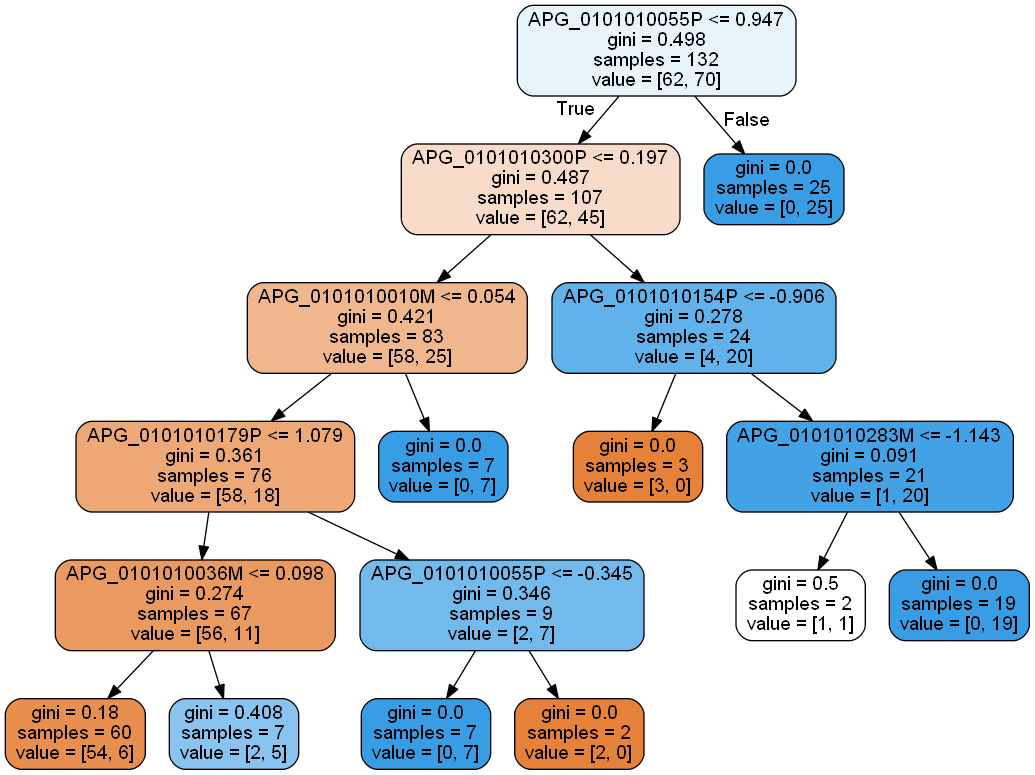

In [8]:
#模型基于决策树，可视化决策树的决策过程
tree=DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=6).fit(X_train,y_train)
features=X_test.columns
dot_data=StringIO()
export_graphviz(tree,out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())